In [11]:
pwd

'G:\\Meine Ablage\\LVA\\PhD Lectures\\Machine-Learning-Workshop\\code'

In [10]:
cd ..

G:\Meine Ablage\LVA\PhD Lectures\Machine-Learning-Workshop\code


In [20]:
from keras import models
import numpy as np
import imp
import modules.functions_pattern_recognition as fpr
imp.reload(fpr)
from keras import backend
from keras.preprocessing import image
import keras
import matplotlib.pyplot as plt


# Load model

In [12]:

model = models.load_model('../models/windturbines-simple-model-027-0.988224-1.000000.h5')


# True positives

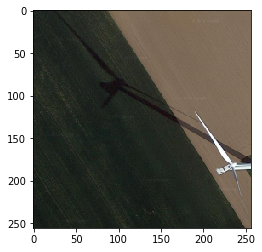

In [13]:
f = '../presentations/figures/true_positive_4.png'
img = fpr.load_show_image(f)



[[0.99900454]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


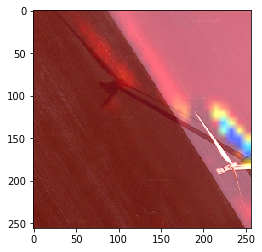

In [14]:
fpr.check_image(f, model)

# False negatives

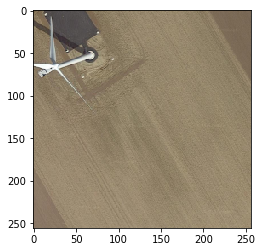

In [15]:
f = '../presentations/figures/false_negative_2.png'
img = fpr.load_show_image(f)



[[0.82281065]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


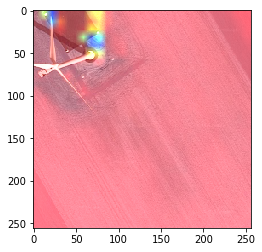

In [16]:
fpr.check_image(f, model)

# False Positives

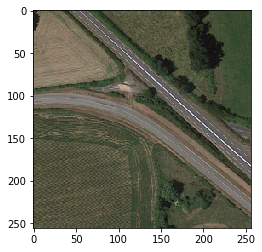

In [17]:
f = '../presentations/figures/false_positive_3.png'
img = fpr.load_show_image(f)


[[0.9995303]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


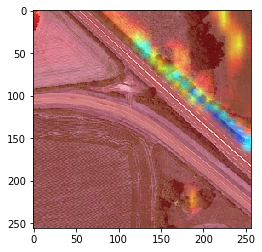

In [18]:
fpr.check_image(f, model)

# What has the network learnt?

C:\Users\jschmidt\Anaconda3.1\envs\keras_pil_gdal_scikit-image_3.7\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


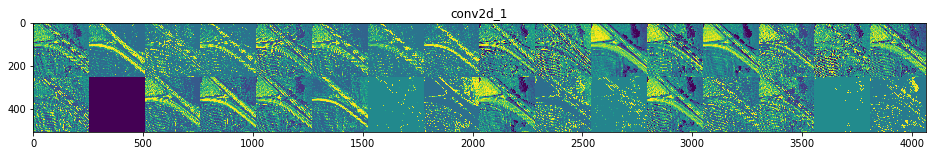

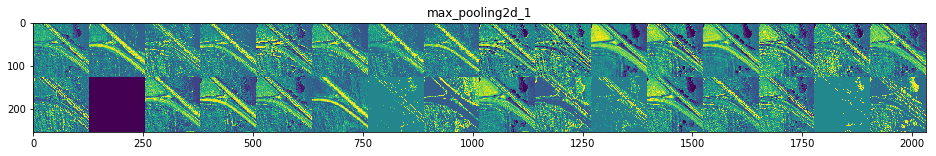

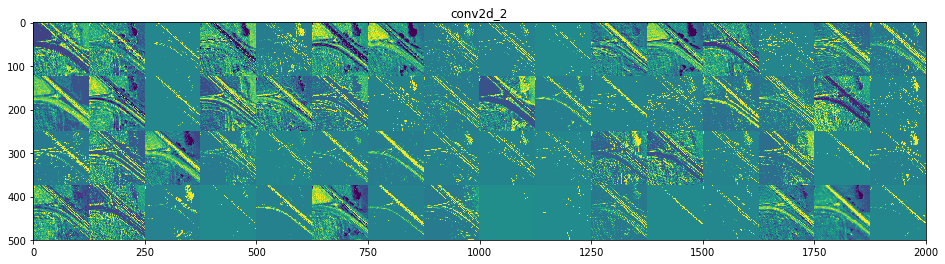

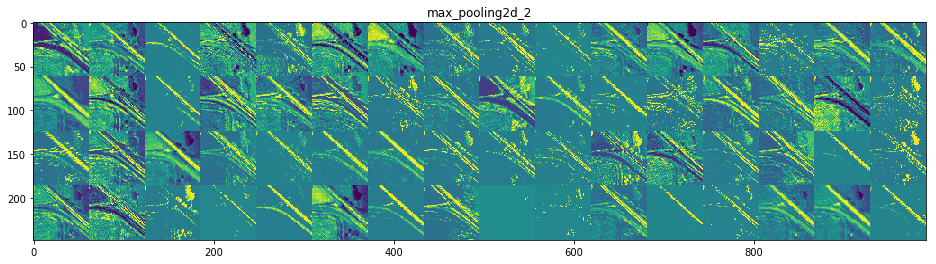

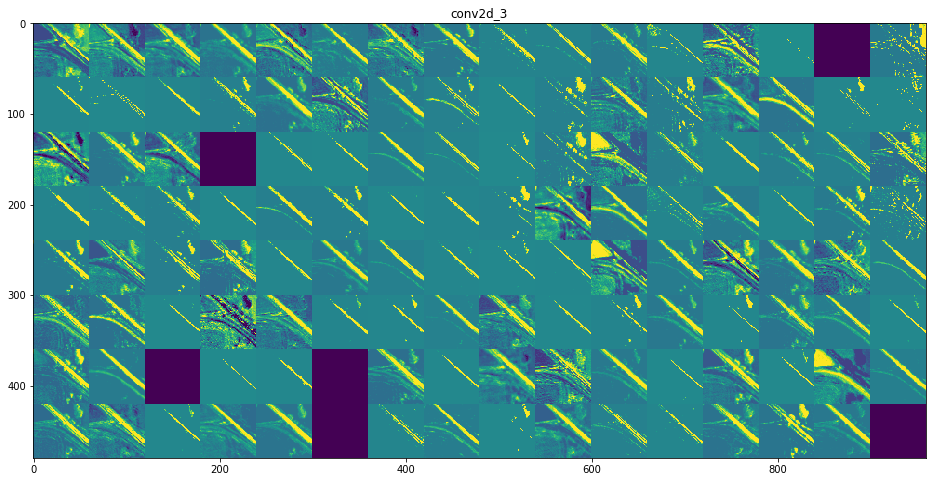

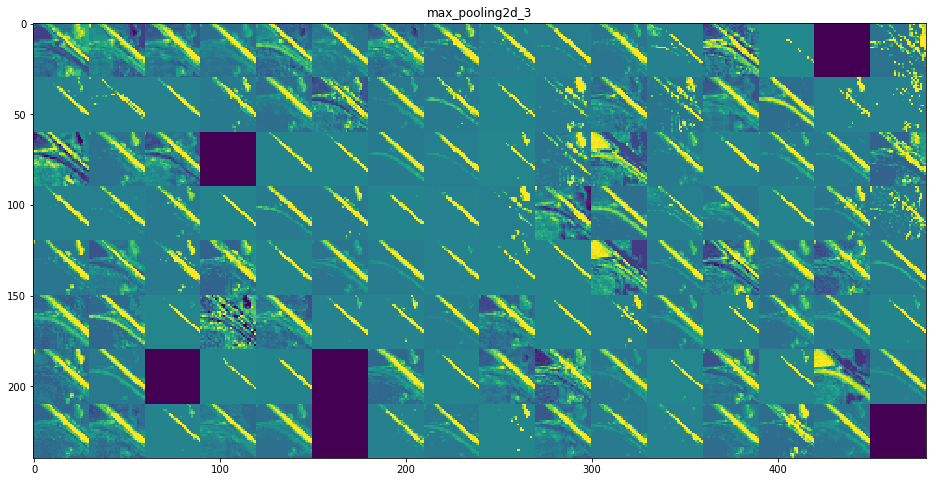

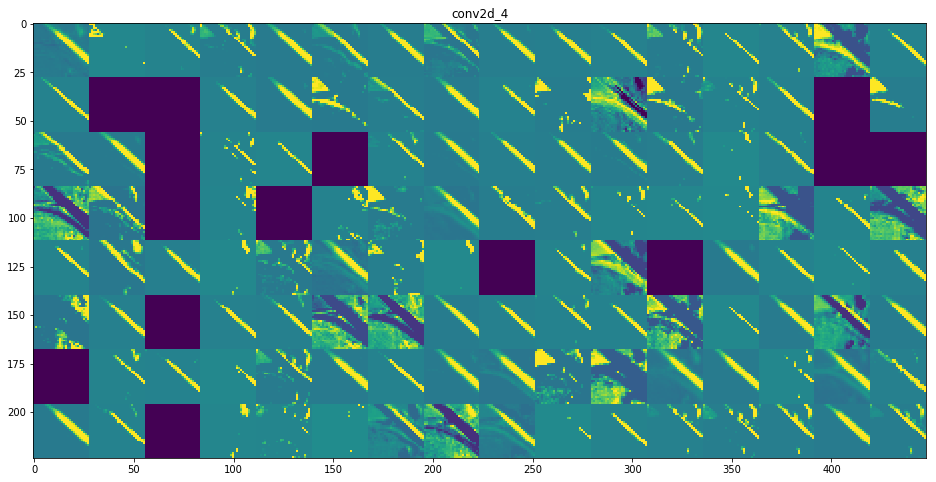

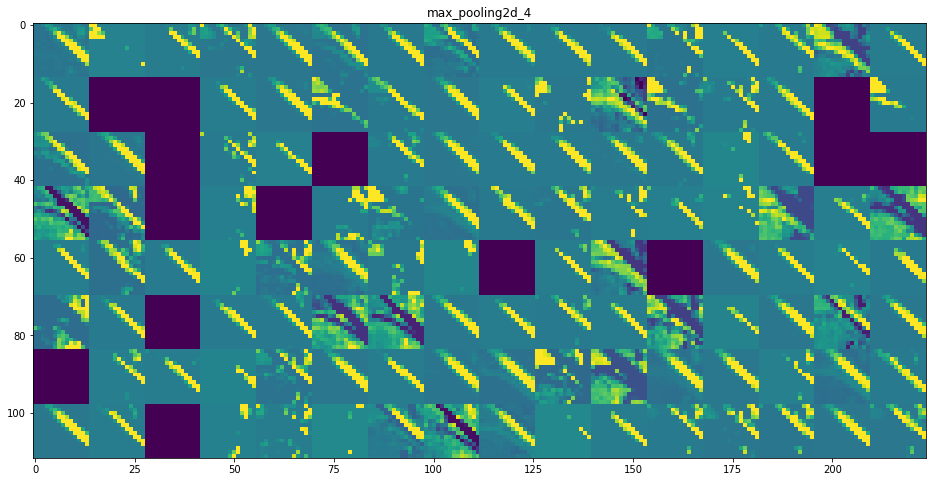

In [19]:
f = '../presentations/figures/false_positive_3.png'
#f = '../presentations/figures/true_positive_4.png'

img = image.load_img(f, target_size=(256, 256))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.


# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()